In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

amazon_poor = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Amazon/bandits_amazon_poor.csv")
amazon_rich = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Amazon/bandits_amazon_rich.csv")
goodreads_poor = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Goodreads/bandits_goodreads_poor.csv")
goodreads_rich = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Goodreads/bandits_goodreads_rich.csv")
google_poor = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Google/bandits_google_poor.csv")
google_rich = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Google/bandits_google_rich.csv")
yelp_poor = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Yelp/bandits_yelp_poor.csv")
yelp_rich = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Simulation/Yelp/bandits_yelp_rich.csv")


In [ ]:
datasets = {
    'amazon_poor': amazon_poor,
    'amazon_rich': amazon_rich,
    'goodreads_poor': goodreads_poor,
    'goodreads_rich': goodreads_rich,
    'google_poor': google_poor,
    'google_rich': google_rich,
    'yelp_poor': yelp_poor,
    'yelp_rich': yelp_rich
}



In [ ]:
import numpy as np
import pandas as pd
import ast  

def convert_string_to_array(s):
    if isinstance(s, str):
        s = s.replace('\n', '').replace('\r', '').strip()
        try:
            return np.array(ast.literal_eval(s))
        except:
            return np.array([])  
    elif isinstance(s, np.ndarray):
        return s
    else:
        return np.array(s)

for name, df in datasets.items():
    df['bandit_a'] = df['bandit_a'].apply(convert_string_to_array)
    df['bandit_b'] = df['bandit_b'].apply(convert_string_to_array)

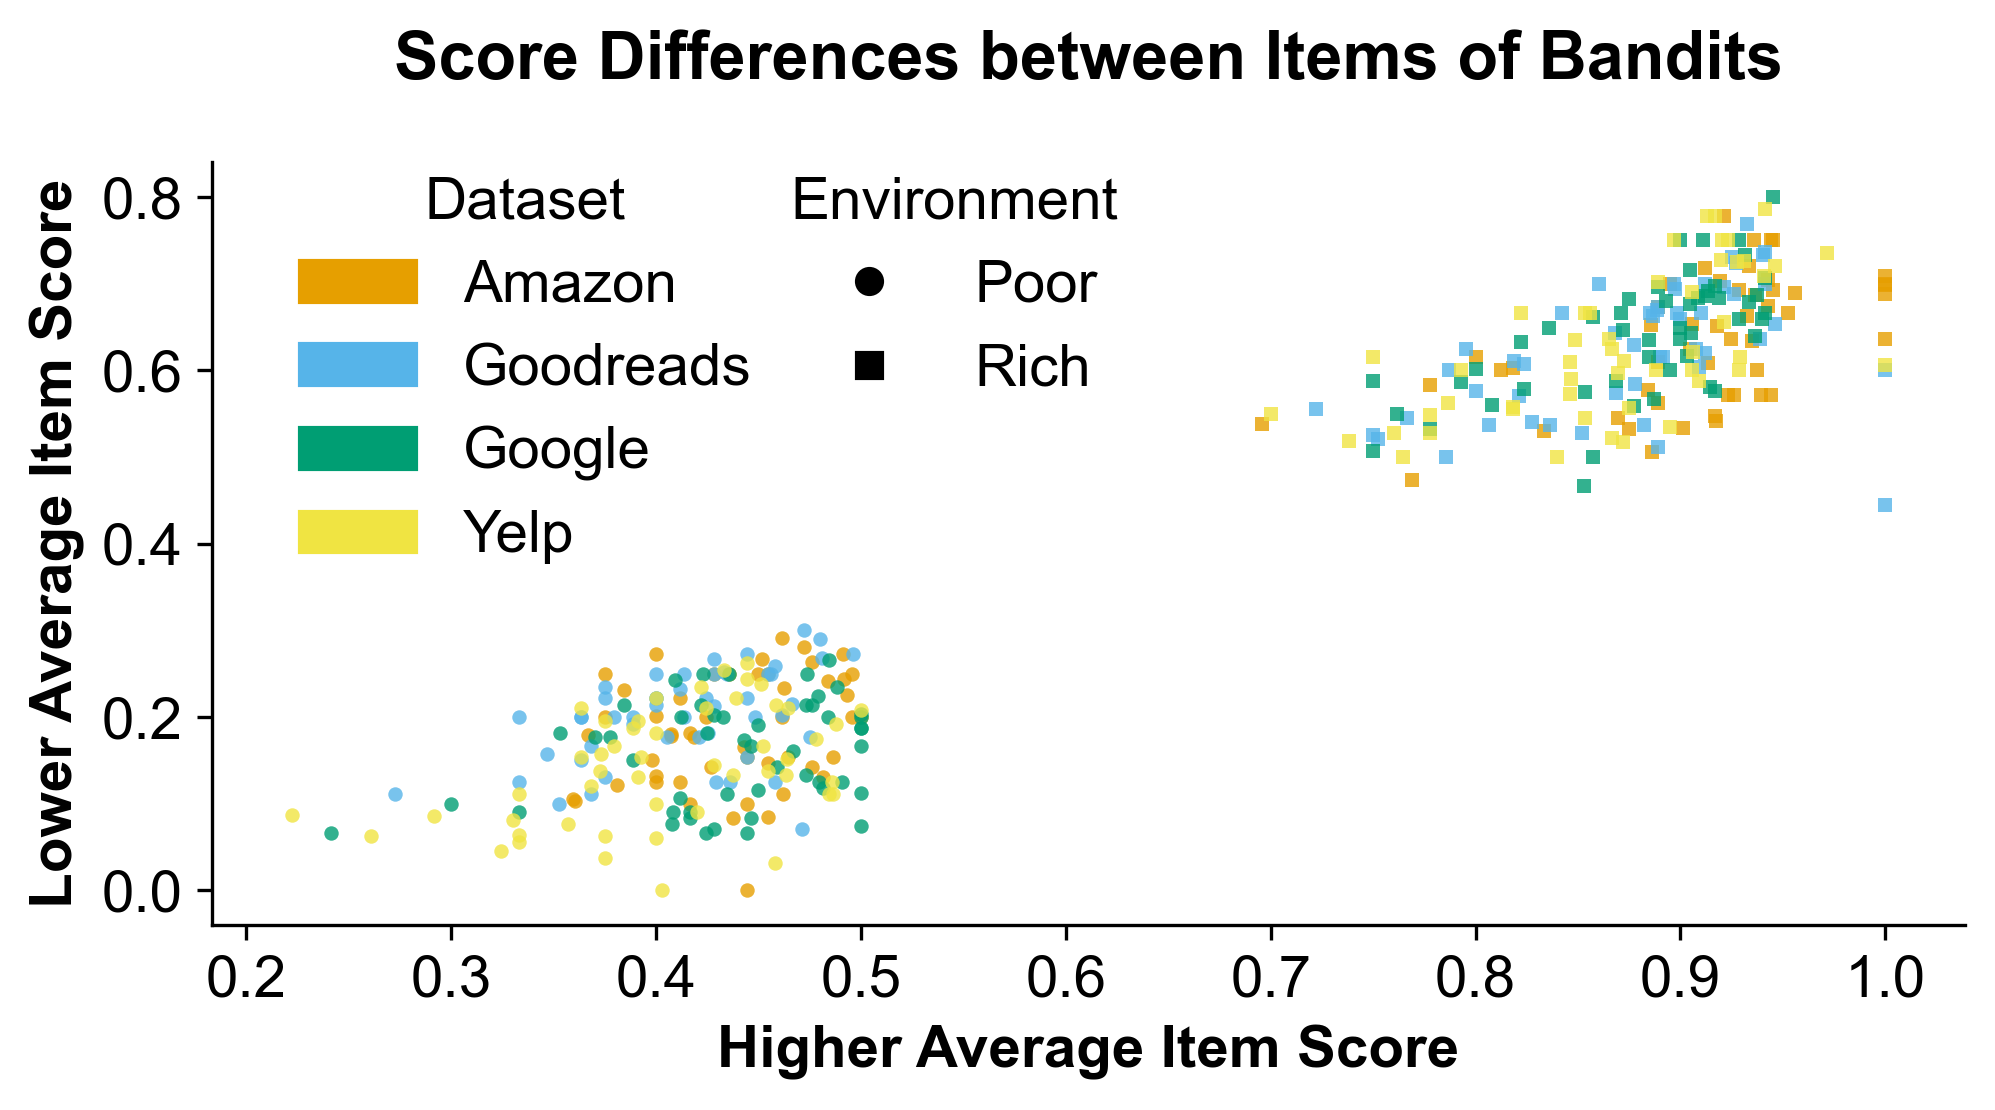

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import pandas as pd

# APA-style 
plt.rcdefaults()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (6.75, 3.8)
plt.figure(dpi=300) 

colors = {
    'Amazon': '#E69F00',  
    'Goodreads': '#56B4E9',  
    'Google': '#009E73', 
    'Yelp': '#F0E442'  
}

env_markers = {'poor': 'o', 'rich': 's'} 
env_labels = {'poor': 'Poor', 'rich': 'Rich'}  

stats = []

for dataset_name, df in datasets.items():
    base_name = next((name for name in colors.keys() if name.lower() in dataset_name.lower()), None)
    if base_name is None:
        continue
        
    env = 'poor' if 'poor' in dataset_name.lower() else 'rich'
    
    avg_a = df['bandit_a'].apply(np.mean)
    avg_b = df['bandit_b'].apply(np.mean)
    
    higher_avg = np.where(avg_a > avg_b, avg_a, avg_b)
    lower_avg = np.where(avg_a > avg_b, avg_b, avg_a)
    
    plt.scatter(higher_avg, lower_avg, 
                color=colors[base_name], 
                marker=env_markers[env],
                s=12,  
                alpha=0.8,
                edgecolors=None,
                linewidths=0)

plt.xlabel('Higher Average Item Score', fontsize=14, fontweight='bold')
plt.ylabel('Lower Average Item Score', fontsize=14, fontweight='bold')
plt.title('Score Differences between Items of Bandits', 
          fontsize=16, pad=20, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

dataset_patches = [
    mpatches.Patch(color=color, label=name)
    for name, color in colors.items()
]
legend1 = plt.legend(handles=dataset_patches, 
                     title='Dataset', 
                     title_fontsize=14, 
                     fontsize=14, 
                     loc='upper left',
                     bbox_to_anchor=(0.02, 1.05),  
                     frameon=False)

ax.add_artist(legend1)

env_handles = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None', 
                  markersize=6, label=label)
    for env, marker in env_markers.items()
    for key, label in env_labels.items() if env == key
]
legend2 = plt.legend(handles=env_handles,
                     title='Environment',
                     title_fontsize=14,
                     fontsize=14,
                     loc='upper left',
                     bbox_to_anchor=(0.3, 1.05), 
                     frameon=False)

plt.tight_layout()
plt.show()
